In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [140]:
df = pd.read_csv("blca__concensus.csv")

In [154]:
df["consensusClass"].value_counts()

consensusClass
Ba/Sq          31
Stroma-rich    27
LumP            8
LumU            6
LumNS           1
NE-like         1
Name: count, dtype: int64

In [142]:
timestamp = "2024-11-25_15-35-12"
n_tcns = 5

In [143]:
file_path = "/home/owkin/project/cytocommunity_results/fractions/raw/ImageNameList.txt"
# Open and read the file into a list
with open(file_path, "r") as file:
    ImageNameAll = [line.strip() for line in file]  # Remove trailing newlines/whitespaces

In [144]:
tcn_fractions = np.zeros((len(ImageNameAll), n_tcns))
for ind_sample, ImageName in enumerate(ImageNameAll):
    tcn = pd.read_csv(
        f"/home/owkin/project/cytocommunity_results/fractions/supervised/experiments/{timestamp}/ensemble/ImageCollection/{ImageName}/TCNLabel_MajorityVoting.csv",
        header = None
    )
    tcn = tcn[0].tolist()
    for tcn_num in range(n_tcns):
        tcn_fractions[ind_sample, tcn_num] = tcn.count(tcn_num+1)/len(tcn)

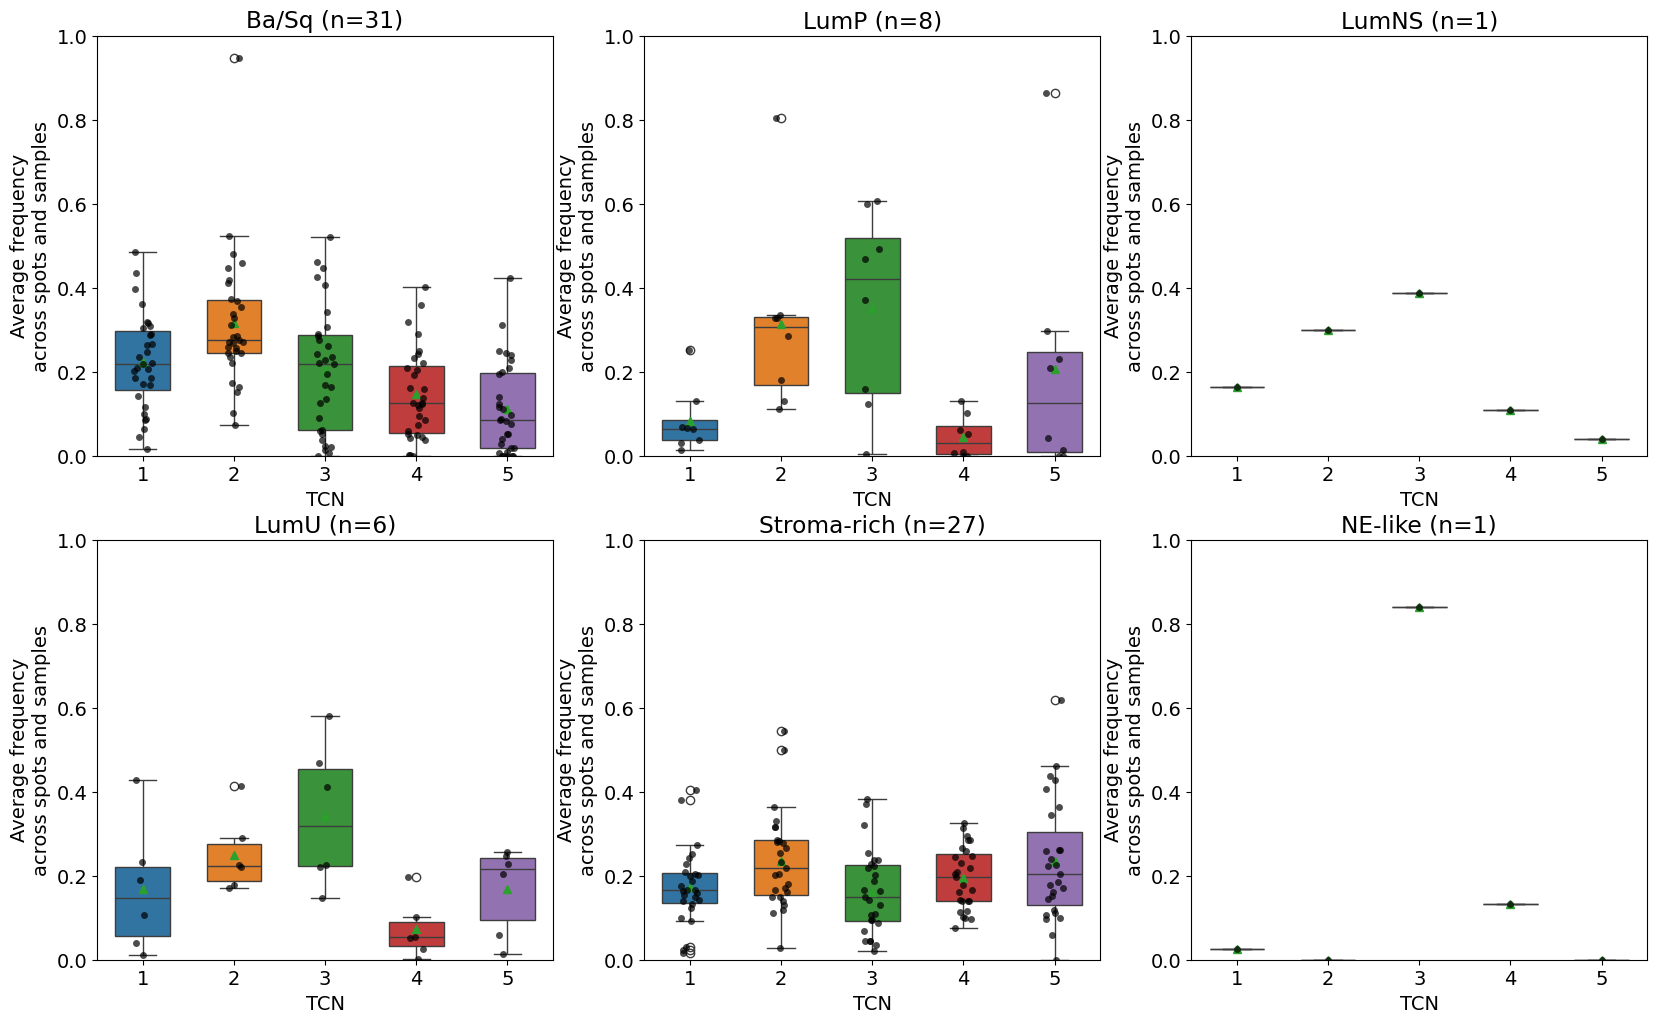

In [167]:
plt.figure(figsize=(20,12))
tcn_fractions_subgroups = {}
for i, subgroup_name in enumerate(df['consensusClass'].unique().tolist()):

    plt.subplot(2,3,i+1)
    
    
    indices = df.index[df['consensusClass'] == subgroup_name].tolist()
    tcn_fractions_subgroups[subgroup_name] = tcn_fractions[indices, :]
    
    # Example 2D NumPy array (rows = samples, columns = features)
    data = tcn_fractions_subgroups[subgroup_name]
    
    # Convert the NumPy array into a Pandas DataFrame for compatibility with Seaborn
    df_data = pd.DataFrame(data, columns=[f"{i+1}" for i in range(data.shape[1])])
    
    # Create the boxplot
    sns.boxplot(data=df_data, width=0.6, showmeans=True)
    
    # Add scattered points
    sns.stripplot(data=df_data, color="black", size=5, jitter=True, alpha=0.7)
    
    # Customize plot
    plt.xlabel("TCN")
    plt.ylabel("Average frequency\nacross spots and samples")
    plt.title(f"{subgroup_name} (n={data.shape[0]})")
    plt.ylim([0,1])

# Show plot
plt.show()


In [149]:
import scikit_posthocs as sp

# Example data: 50 samples across 5 groups
np.random.seed(42)
n_samples, n_groups = 50, 5
groups = np.random.randint(0, n_groups, n_samples)  # Randomly assign samples to groups
data = np.random.randn(n_samples)  # Random values for the samples

# Prepare the data
df = pd.DataFrame({"values": data, "groups": groups})

# Perform Dunn's test (1-vs-all comparisons automatically handled)
dunn_results = sp.posthoc_dunn(df, val_col="values", group_col="groups", p_adjust="bonferroni")

print("Dunn's test p-values (1-vs-all):")
print(dunn_results)

31

In [179]:
import scikit_posthocs as sp


# Reshape the array into long format for Dunn's test
n_groups = 5
tcn_fractions_subgroups_current = tcn_fractions_subgroups["Stroma-rich"]



In [180]:
import numpy as np
import scikit_posthocs as sp

# Assuming tcn_fractions_subgroups_current is a NumPy array of shape (n_samples, 5)
# Each column corresponds to a group

n_samples, n_groups = tcn_fractions_subgroups_current.shape
p_values = []

# For each group (1 vs all comparisons)
for i in range(n_groups):
    # Set 1: The data for the current group
    group_1 = tcn_fractions_subgroups_current[:, i]
    
    # Set 2: The data for all other groups combined
    group_others = np.hstack([tcn_fractions_subgroups_current[:, j] for j in range(n_groups) if j != i])
    
    # Perform Dunn's test between group_1 and group_others
    data = [group_1, group_others]
    p_value_matrix = sp.posthoc_dunn(data, p_adjust='bonferroni')  # You can adjust the p-value method as needed
    
    # Extract the p-value for the comparison (1 vs all)
    # Accessing the relevant p-value from the matrix (it will be in the position (0, 1) or (1, 0))
    p_value = p_value_matrix.iloc[0, 1]  # Adjust this if necessary depending on DataFrame structure
    
    p_values.append(p_value)

print(p_values)


[0.22410640755809585, 0.044083077947436246, 0.035613488886958575, 0.8819307212779461, 0.24801994379313452]
